# Figure和Subplot

In [182]:
import matplotlib.pyplot as plt

In [183]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [184]:
ax1 = fig.add_subplot(2, 2, 1) # 图像2x2，且当前选中的是4个subplot的第一个（编号从1开始）

In [185]:
ax2 = fig.add_subplot(2, 2, 2)

In [186]:
ax3 = fig.add_subplot(2, 2, 3)

In [171]:
from numpy.random import randn

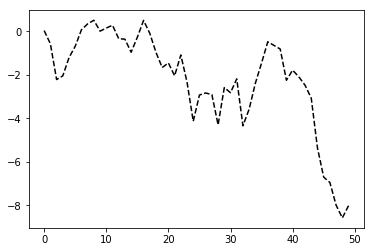

In [172]:
plt.plot(randn(50).cumsum(), 'k--')  

In [173]:
import numpy as np
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))
plt.show()

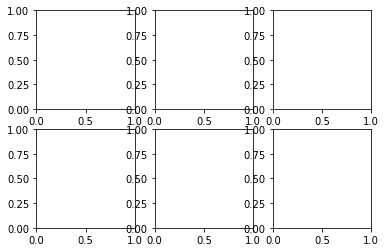

In [174]:
#可以创建一个新的Figure，并返回一个含有已创建的subplot对象的Numpy数组
fig, axes = plt.subplots(2, 3)

In [175]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D6558D0>,
      dtype=object)

In [176]:
axes[0, 1]

#Figure的subplots_adjust方法可以修改间距

In [177]:
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)  ## wspace和hspace用于控制高度和宽度的百分比.

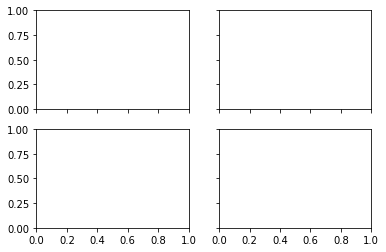

In [24]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [25]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)

In [26]:
plt.subplots_adjust(wspace=0, hspace=0)  # 注意看下面的代码，是对fig调用的

<Figure size 432x288 with 0 Axes>

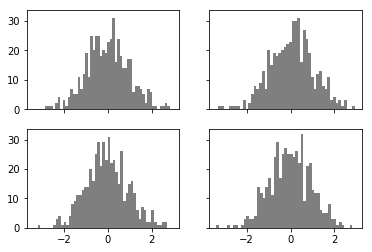

In [29]:
fig

In [30]:
fig.subplots_adjust(wspace=0, hspace=0)  # 调整了间距

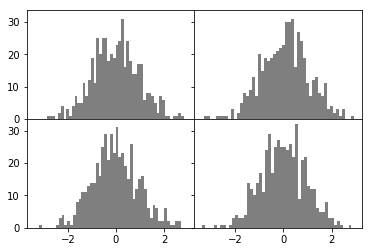

In [31]:
fig # 发现轴标签可能会重叠

# 颜色、标记和线型

plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写

In [33]:
ax1.plot(x, y ,'g--')  # 根据x和y绘制绿色虚线

NameError: name 'x' is not defined

In [34]:
# 上述代码等价于：
ax.ployt(x, y, linestyle='--', color='g')

NameError: name 'ax' is not defined

常用的颜色都有一个缩写词，要使用其他任意颜色则可以指定其RGB值得形式使用，例如‘#CECECE’
线型图还可以加上一些标记，以强调实际的数据点。由于matplotlib创建的是连续的线型图（点与点之间插值），因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放到颜色后面

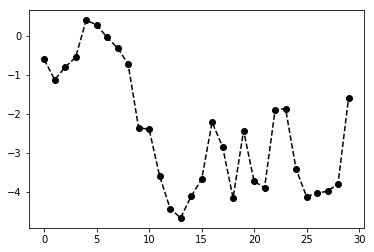

In [35]:
plt.plot(randn(30).cumsum(), 'ko--')

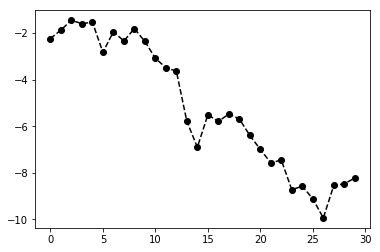

In [36]:
# 可以写的更加明确
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

在线型图中，非实际数据点默认是按线型方式插值的。可以通过drawstyle选项修改

In [37]:

data = randn(30).cumsum()

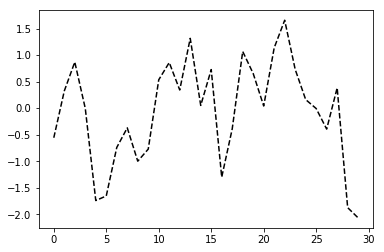

In [38]:
plt.plot(data, 'k--', label='Default')

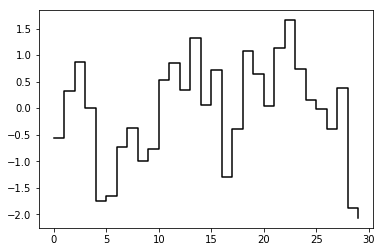

In [39]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

No handles with labels found to put in legend.


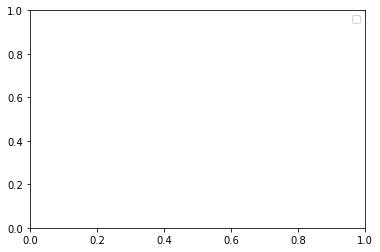

In [40]:
plt.legend(loc='best')

# 刻度、标签和图例

1调用时不带参数：plt.xlim()返回当前的X轴绘图范围;

2调用带参数：plt.xlim([0,10])会将X轴的范围设置为0-10.

设置标题、轴标签、刻度以及刻度标签

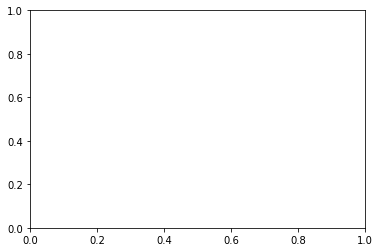

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [42]:
ax.plot(randn(1000).cumsum())

要修改x的刻度，最简单的办法是使用set_xticks和set_xticklabels

前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。 但是我们可以通过set_xticklabels将任何洽谈的值用作标签

In [43]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [44]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

##最后用set_xlabels为X轴设置一个名词，用set_title设置标题

In [45]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [46]:
ax.set_xlabel('Stages')
ax.set_ylabel('size')

Text(3.200000000000003, 0.5, 'size')

In [47]:
ax

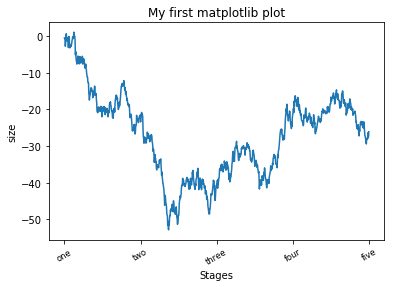

In [48]:
fig

# 添加图例

图例（legend）是另一种用于标识图表元素的重要工具。

两种方法：
1.在添加subplot的时候传入label参数;
2.

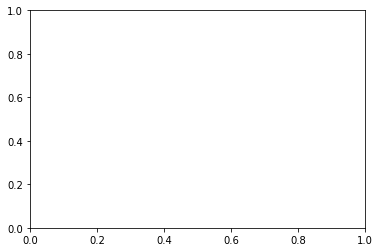

In [49]:
fig = plt.figure();ax = fig.add_subplot(1, 1, 1)

In [51]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [52]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [53]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [54]:
ax.legend()

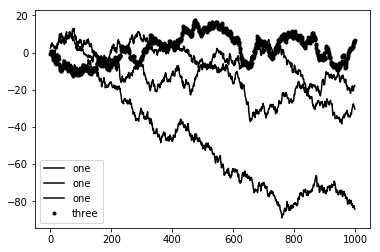

In [55]:
fig

# 注解以及在Subplot上绘图

有时候希望绘制一些自定义的注解（比如文本、箭头或者其他图标）

注解可以通过text\arrow和annotate等函数进行添加

text可以将文本绘制在图表的指定坐标（x，y），还可以加一些自定义格式

In [56]:
ax.text(x,y,'Hello world',family='monospace', fontsize=10)

NameError: name 'x' is not defined

注解中既可以含有文本也可以含有箭头

例如我们根据2007年依赖的标准普尔500指数收盘价格绘制一张曲线图，并标出2008年到2009年金融危机期间的一些重要日期

In [57]:
from datetime import datetime
import pandas as pd

In [58]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [59]:
ax = fig.add_subplot(1, 1, 1)

In [64]:
data = pd.read_csv(r'C:\Users\Administrator\Desktop\新一期DataAnalysis\PythonForDataAnalysis\ch08\spx.csv', index_col=0, parse_dates=True)

In [65]:
spx = data['SPX']

In [66]:
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
1990-02-08     332.96
1990-02-09     333.62
1990-02-12     330.08
1990-02-13     331.02
1990-02-14     332.01
1990-02-15     334.89
1990-02-16     332.72
1990-02-20     327.99
1990-02-21     327.67
1990-02-22     325.70
1990-02-23     324.15
1990-02-26     328.67
1990-02-27     330.26
1990-02-28     331.89
1990-03-01     332.74
1990-03-02     335.54
1990-03-05     333.74
1990-03-06     337.93
1990-03-07     336.95
1990-03-08     340.27
1990-03-09     337.93
1990-03-12     338.67
1990-03-13     336.00
1990-03-14     336.87
1990-03-15     338.07
               ...   
2011-09-02    1173.97
2011-09-06    1165.24
2011-09-07    1198.62
2011-09-08    1185.90
2011-09-09    1154.23
2011-09-12    1162.27
2011-09-13    1172.87
2011-09-14    1188.68
2011-09-15    1209.11
2011-09-16    1216.01
2011-09-19    1204.09
2011-09-20    1202.09
2011-09-21    1166.76
2011-09-22    1129.56
2011-09-23

In [67]:
spx.plot(ax=ax, style='k-')

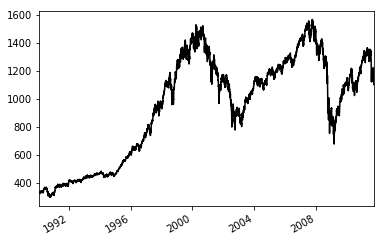

In [68]:
fig

In [69]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
]

In [70]:
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+50),
               xytext=(date, spx.asof(date)+200),
               arrowprops=dict(facecolor='black'),
               horizontalalignment='left', verticalalignment='top')

In [71]:
# 放大到2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

(600, 1800)

In [72]:
ax.set_title('Important dates in 2008-2009 financial crisis')
ax

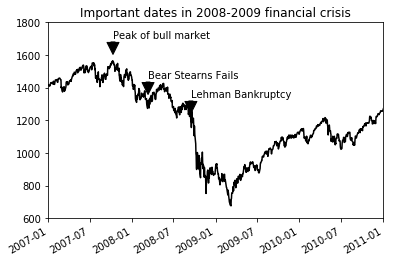

In [73]:
fig

为图表添加一个图形

In [74]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [75]:
ax = fig.add_subplot(1, 1, 1)

In [76]:
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)

In [77]:
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)

In [78]:
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

In [79]:
ax.add_patch(rect)

In [80]:
ax.add_patch(circ)

In [81]:
ax.add_patch(pgon)

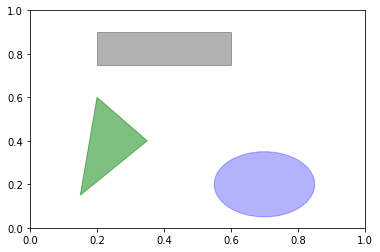

In [82]:
fig

# 将图表保存到文件

plt.savefig可以将当前图表保存到文件，例如要将图表保存为SVG文件，你只需要输入：

In [83]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

In [87]:
# 要得到一张带有最小白边且分辨率为400DPI的PNG图片。可以：
fig.savefig(r'C:\Users\Administrator\Desktop\figpath.png', dpi=400, bbox_inches='tight')

In [89]:
# savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如StringIO
from io import StringIO

In [90]:
buffer = StringIO()

In [92]:
fig.savefig(buffer)
plot_data = buffer.getvalue()

TypeError: string argument expected, got 'bytes'

# pandas中的绘图函数

1线型图

In [93]:
from pandas import Series, DataFrame
s = Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))

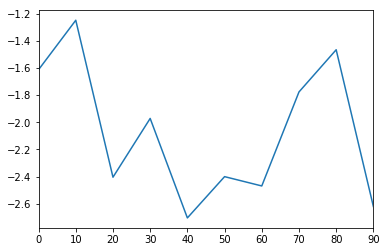

In [94]:
s.plot()        # 索引用以绘制X轴，可以通过use_index=False禁用该功能
# x轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴就用yticks和ylim

DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例

In [95]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
              columns=['A','B','C','D'],
              index=np.arange(0,100, 10))

In [97]:
df

,A,B,C,D
0,0.134323,-1.835684,-1.239521,-0.910069
10,1.319409,-1.644505,-0.315448,0.102242
20,0.785321,-3.725505,0.359433,-0.472631
30,1.693239,-3.982937,0.035150,1.605439
40,1.229866,-4.625788,-0.257735,1.257261
50,2.017524,-3.925381,0.301422,3.015888
60,2.062093,-5.732201,0.091999,3.484172
70,2.450692,-4.197454,0.486201,3.446346
80,2.734820,-5.582790,-0.401692,3.202384
90,1.387801,-5.658128,-1.733025,2.527873


In [98]:
df.plot

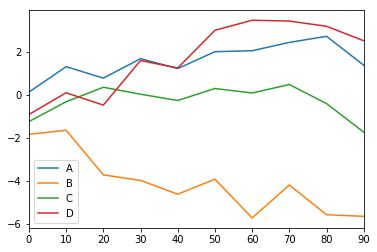

In [101]:
df.plot()

# 柱状图

在代码中加上参数kind='bar'(垂直柱状图)或kind='barh'(水平柱状图)即可生成柱状图。

此时，Series和DataFrame的索引会被用作X（bar）或Y（barh）刻度

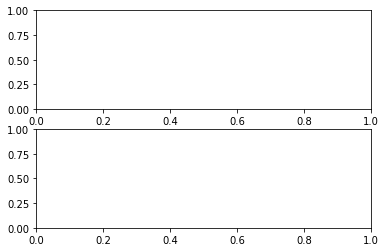

In [102]:
fig, axes = plt.subplots(2, 1)

In [103]:
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [104]:
data.plot(kind='bar', ax=axes[0], color='k',alpha=0.7)  # axes[0]选择第一个面板

In [105]:
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

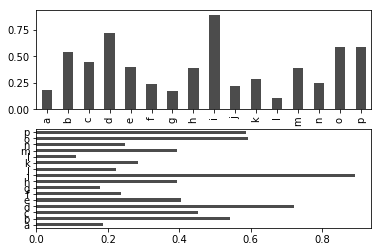

In [106]:
fig

In [107]:

# 对于DataFrame，柱状图会将每一行的值分为一组
df = DataFrame(np.random.randn(6,4), index=['one', 'three','four', 'five', 'five', 'six'],
              columns=pd.Index(['A','B','C','D'], name='Genus'))

In [108]:
df

Genus,A,B,C,D
one,0.291911,0.800525,0.222540,-1.089371
three,0.700235,0.065397,-0.189639,0.940045
four,-1.219446,0.174206,-0.184162,1.600730
five,-0.483897,-0.029534,1.044085,-0.515359
five,-0.045267,0.549029,0.882939,0.950601
six,1.307237,-1.379900,-0.986793,2.080737


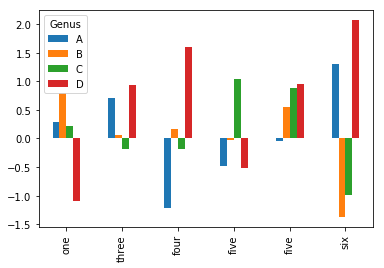

In [109]:
df.plot(kind='bar')

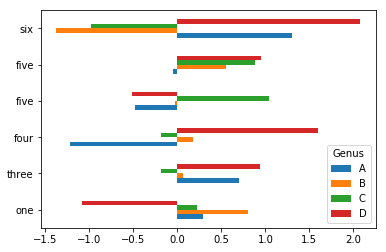

In [110]:
df.plot(kind='barh')

观察发现，DataFrame各列的名称“Genus”被用作了图例的标题。设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起

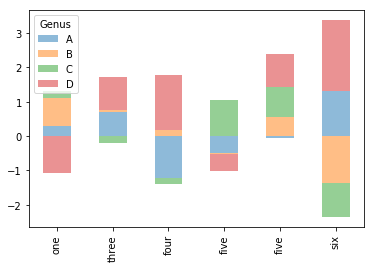

In [112]:
df.plot(kind='bar', stacked=True, alpha=0.5)

柱状图有一个非常不错的用法，利用value_counts图形化显示Series中各值的出现频率

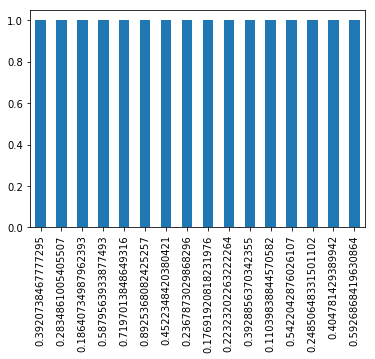

In [113]:
data.value_counts().plot(kind='bar')

# 直方图和密度图

直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。

密度图是通过计算“可能会产生观测数据的连续概率分布的估计”，一般的过程是将该分布近似为一组核（即诸如正态（高斯）分布之类的简单的分布）。
因此密度也被称为KDE（Kernel Density Estimate，核密度估计）图。调用plot加上参数kind='kde'即可生成密度图。

In [114]:
tips['tip_pct']=tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins=50)
plt.show()

NameError: name 'tips' is not defined

In [115]:
#密度图 kind='kde'
tips['tip_pct'].plot(kind='kde')
plt.show()

NameError: name 'tips' is not defined

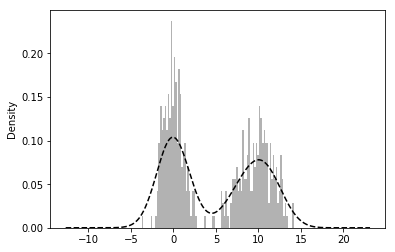

In [118]:
comp1=np.random.normal(0,1,size=200)#N(0,1)
comp2=np.random.normal(10,2,size=200)# (10,4)
values=Series(np.concatenate([comp1,comp2]))
values.hist(bins=100,alpha=0.3,color='k',density=True)
values.plot(kind='kde',style='k--')
plt.show()

# 散布图

散布图（scatte plot）是观测两个一维数据序列之间的关系的有效手段

In [119]:
macro = pd.read_csv(r'C:\Users\Administrator\Desktop\新一期DataAnalysis\PythonForDataAnalysis\ch08\macrodata.csv')

In [120]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [121]:
trans_data = np.log(data).diff().dropna()

In [122]:
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
6,0.006745,0.004980,-0.127155,0.074108
7,0.003021,0.001418,-0.030110,0.117783
8,-0.001006,0.007062,0.034338,0.076373
9,0.003683,0.005614,-0.034338,0.028988
10,0.002003,0.008362,0.013015,-0.028988


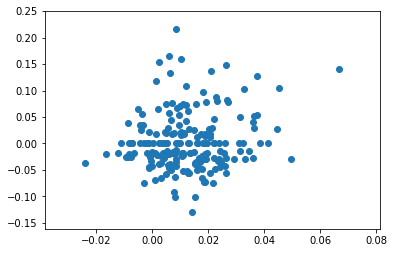

In [123]:
# 利用plt.scatter可以轻松绘制散布图
plt.scatter(trans_data['m1'], trans_data['unemp'])

Text(0.5, 1.0, 'Changes in log m1 vs. log unemp')

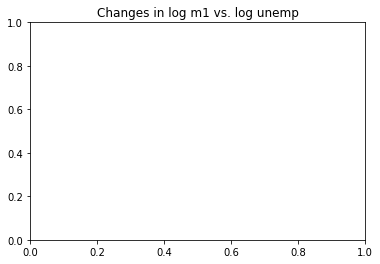

In [124]:
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7C5E10>,
      dtype=object)

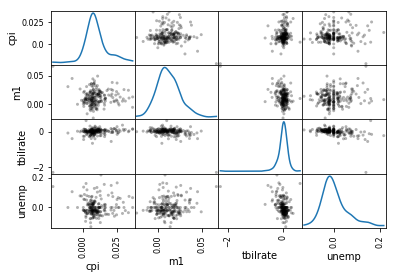

In [125]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

# 绘制地图:图形化显示海地地震危机数据

In [126]:
data = pd.read_csv(r'C:\Users\Administrator\Desktop\新一期DataAnalysis\PythonForDataAnalysis\ch08\Haiti.csv')

In [127]:
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [128]:
# 每一行表示一条从某人的手机上发送的紧急或其他问题的报告，每条报告有一个时间戳和位置（经度和纬度）
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [129]:
# CATEGORY字段含有一组以都好分隔的代码，这些代码表示消息的类型
data['CATEGORY']

0             1. Urgences | Emergency, 3. Public Health, 
1       1. Urgences | Emergency, 2. Urgences logistiqu...
2       2. Urgences logistiques | Vital Lines, 8. Autr...
3                               1. Urgences | Emergency, 
4                               1. Urgences | Emergency, 
5                          5e. Communication lines down, 
6       4. Menaces | Security Threats, 4e. Assainissem...
7                         4. Menaces | Security Threats, 
8       2. Urgences logistiques | Vital Lines, 2f. San...
9       2. Urgences logistiques | Vital Lines, 2d. Ref...
10      1a. Highly vulnerable, 2. Urgences logistiques...
11      4. Menaces | Security Threats, 4e. Assainissem...
12      2. Urgences logistiques | Vital Lines, 2d. Ref...
13      2. Urgences logistiques | Vital Lines, 2b. Pen...
14                                     3. Public Health, 
15                2. Urgences logistiques | Vital Lines, 
16      1. Urgences | Emergency, 7. Secours | Services...
17            

In [130]:
# 仔细观察，发现类型缺失了，因此我们需要丢弃这些数据点
# 此外，调用describe还能发现数据中存在一些异常的地理位置

In [131]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [132]:
# 清楚错误位置信息并移除缺失分类的信息
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) & (data.LONGITUDE < -70) & data.CATEGORY.notnull()]

In [133]:
# 获取所有的分类列表
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

In [134]:
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

In [135]:
# 将各个分类信息拆分为编码和英语名称
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

In [136]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [137]:
# 做一个将编码跟名称映射起来的字典
all_cats = get_all_categories(data.CATEGORY)

In [138]:
# 生成器表达式
english_mapping = dict(get_english(x) for x in all_cats)

In [139]:
english_mapping['2a']

'Food Shortage'

In [140]:
english_mapping['6c']

'Earthquake and aftershocks'

In [141]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [142]:
all_codes = get_code(all_cats)

In [143]:
# 抽取唯一的分类编码
code_index = pd.Index(np.unique(all_codes))

In [144]:
# 构造全零DataFrame
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))), index=data.index, columns=code_index)

In [145]:
dummy_frame

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
# 构造矩阵
for row , cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1

In [147]:
data = data.join(dummy_frame.add_prefix('category_'))

In [150]:
data.iloc[:, 10:15]

,category_1,category_1a,category_1b,category_1c,category_1d
0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0


In [187]:
from mpl_toolkits.basemap import Basemap  # 需要下载basemap库，conda没有自带

KeyError: 'PROJ_LIB'

In [153]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [154]:
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    # 创建极球面投影的Basemap实例
    m = Basemap(ax=ax, projection='stere',
               lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # 绘制海岸线，州界，国界以及地图边界
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

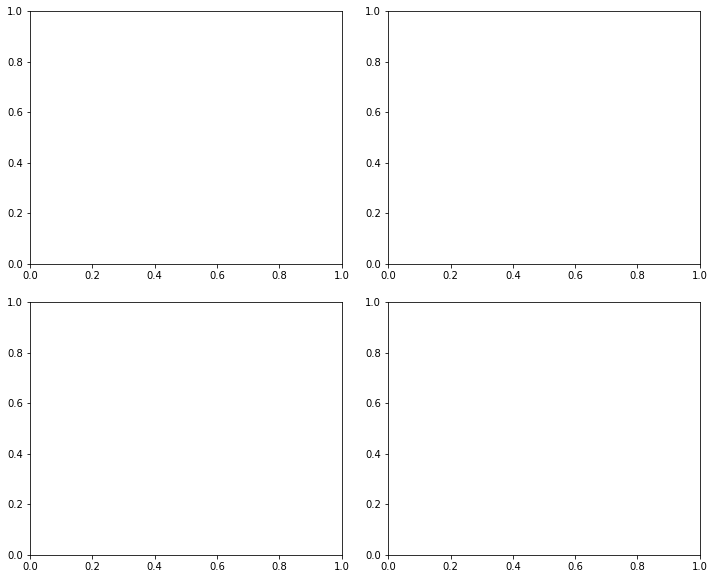

In [155]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.subplots_adjust(hspace=0.15, wspace=0.15)

In [156]:
to_plot = ['2a', '1','3c','7a']

In [157]:
lllat = 17.25
urlat=20.25
lllon=-75
urlon=-71

In [158]:
for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)

NameError: name 'Basemap' is not defined

In [159]:
cat_data =data[data['category_%s' % code] == 1] 
cat_data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,4033,Help needed in Brochette,17/03/2010 13:40,"Brochette 99, Brochette, west of Carrefour","We live in brochette 99, we don't find any hel...","2. Urgences logistiques | Vital Lines, 2b. Pen...",18.525190,-72.458954,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,4021,school materials needed in Mirebalais,27/04/2010 14:44,Mirebalais,"I'm Duclervil Saintody, principal of &lt;Ecole...","1. Urgences | Emergency, 2. Urgences logistiqu...",18.825717,-72.103271,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,4018,Eliante Valentin,03/05/2010 20:05,"664 Blv. Jean Jacques Dessalines, Port-au-Prin...",SOS ! HELP! Eliante Valentin (sleeping in fron...,"2d. Refuge | Shelter needed, 2a. Penurie d'ali...",18.539167,-72.335000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,4010,Starvation in La Gonave,28/01/2010 10:38,There was no specific location within the Island,"Please, can we still be counted as victims of ...","2. Urgences logistiques | Vital Lines, 2a. Pen...",18.829100,-73.015000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,4009,"children need help, in Corail, Jeremie.",27/03/2010 15:52,"Corail, Jeremie","[13727646] · Good morning, it's urgences,urgen...","1b. Urgence medicale | Medical Emergency, 2. U...",18.650000,-74.116667,YES,NO,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,3999,Food needed on Delmas 41,12/04/2010 14:36,"Delmas 41, no further location information given.","It was said that the aid is finished, there is...","2. Urgences logistiques | Vital Lines, 2a. Pen...",18.547300,-72.301000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,3997,Help needed in Croix des Bouquets,12/03/2010 09:14,"At intersection of routes 300, 3, and 102",Croix-des-bouquets did not find anything.,"2. Urgences logistiques | Vital Lines, 2b. Pen...",18.576850,-72.228740,YES,YES,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [161]:
# 计算地图的投影坐标
#x,y = m(cat_data.LONGITUDE, cat_data.LATITUDE)  # 报错，改为下面语句
x,y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)
# m(cat_data.LOCATION)

NameError: name 'm' is not defined

In [160]:
m.plot(x, y, 'k.', alpha=0.5)

NameError: name 'm' is not defined

In [162]:
ax.set_title('%s: %s' %(code, english_mapping[code]))

Text(0.5, 1.0, '2a: Food Shortage')

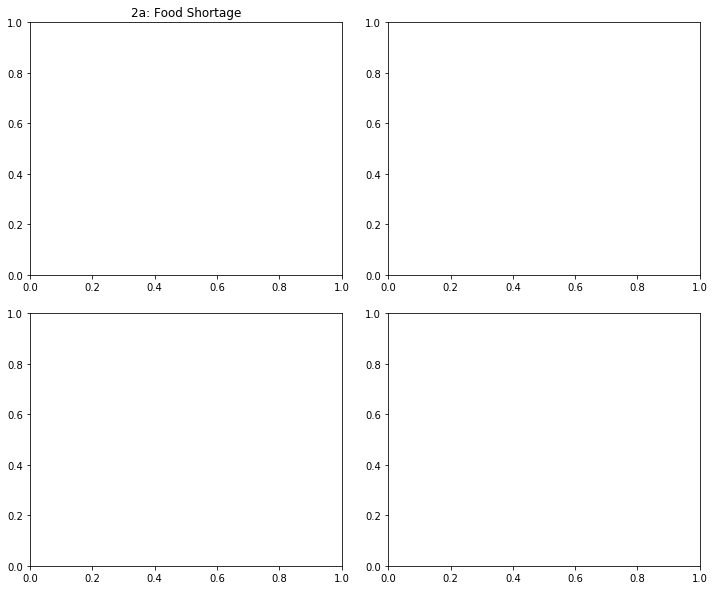

In [163]:
fig

In [164]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

NameError: name 'm' is not defined

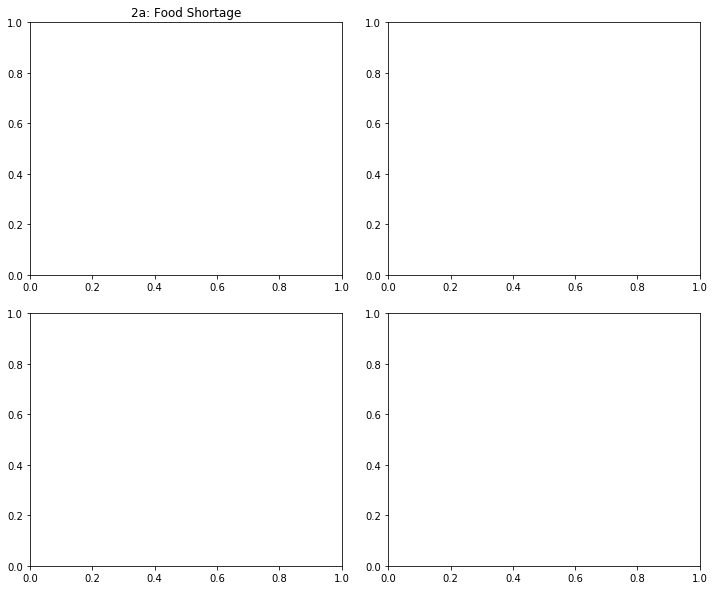

In [165]:
fig